In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
%matplotlib inline
from wordcloud import WordCloud

In [2]:
### read email database

filename = './hillary-clinton-emails/Emails.csv'
df_emails = pd.read_csv(filename)
df_emails.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [3]:
### get all text from mails
text = ''

for index, row in df_emails.iterrows():
    text += str(row.RawText) + ' '

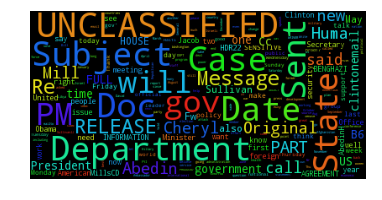

In [4]:
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [5]:
### get all text and preprocess it

In [6]:
### postprocess data using nltk
def cleanData(text):
    # tokenization, stemming + remove punctuation and stop words
    text = text.lower()

    # remove punctuation and stop words
    tknzr = nltk.RegexpTokenizer(r'\w+')
    listWords = tknzr.tokenize(text)
    
    # stemming
    stemmer = nltk.SnowballStemmer("english")

    listWordsClean = [stemmer.stem(word) for word in listWords]    
    return listWordsClean

In [7]:
textClean = cleanData(text)


(-0.5, 399.5, 199.5, -0.5)

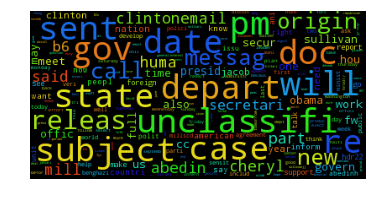

In [8]:
wordcloud = WordCloud(max_font_size=40).generate(" ".join(textClean))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

### Question 2

In [9]:
import pycountry
import nltk.sentiment.vader

In [28]:
analyzer = nltk.sentiment.vader.SentimentIntensityAnalyzer('vader_lexicon.txt')

def getSentimentsCountries(x):
    
     # tokenization, stemming + remove punctuation and stop words
    text = x.RawText.lower()

    # remove punctuation and stop words
    tknzr = nltk.RegexpTokenizer(r'\w+')
    listWords = tknzr.tokenize(text)
    
    countries = list()
    for country in list(pycountry.countries):
        if country.name.lower() in listWords:
            countries.append(country.name)
    
    x['countries'] = countries
    x['score'] = analyzer.polarity_scores(' '.join(listWords))['compound']
    
    return x

In [29]:
### taks a lot of time (1/2 hours)
df_emails = df_emails.apply(getSentimentsCountries, axis=1)

In [30]:
df_emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,countries,score
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,[],0.9468
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,"[Egypt, Spain, France, Israel, Lebanon, Libya,...",0.9390
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,"Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,[],-0.1765
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,"Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,[Egypt],-0.9758
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,"[Egypt, Spain, France, Israel, Lebanon, Libya,...",0.8546


In [161]:
### get list of all countries
allCountries = []
for countries in df_emails.countries.values:
    for country in countries:
        if country not in allCountries:
            allCountries.append(country)

In [162]:
###
scores = []
frequencies = []
for country in allCountries:
    score = df_emails[[country in countries for countries in df_emails.countries.values]].score.values
    frequencies.append(len(score))
    scores.append(np.mean(score))

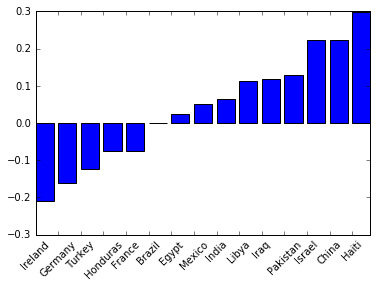

In [165]:
## only keep the 15 countries the most frequently cited
nbCountries = len(allCountries)
index = np.argsort(frequencies)[nbCountries - 16:-1]

y = np.array(scores)[index]
x = np.arange(len(y))
allCountriesS = np.array(allCountries)[index]

## sort countries by score
allCountriesS = allCountriesS[list(np.argsort(x))]
y = np.sort(y)

# plot
plt.xticks(x, allCountriesS,rotation=45)
plt.bar(x, y)
plt.show()